# Cats VS Dogs Classifier

In [5]:
# Importing necessary Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [6]:
## Save the code to Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#Let's see what default dataset is in Tensorflow
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

In [72]:
# Let's load the "rotten_tomatoes" dataset from tfds
# Correcting the split to only request the available 'train' split
(raw_train, raw_val), info = tfds.load(
    'cats_vs_dogs',
    split= ["train[:80%]", "train[80%:]"],
    with_info=True,
    as_supervised=True
    )

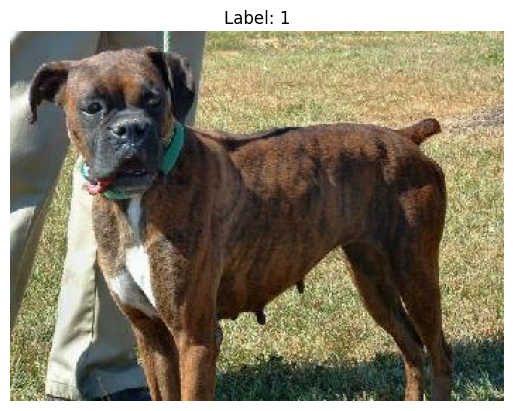

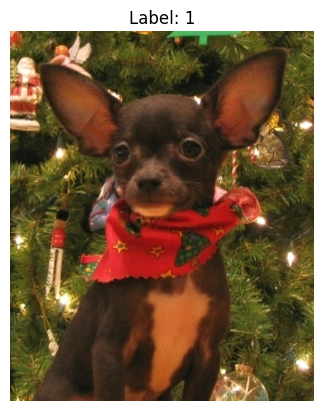

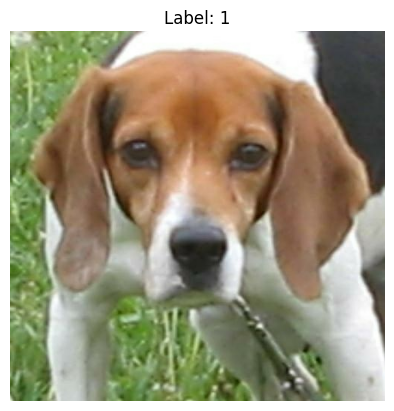

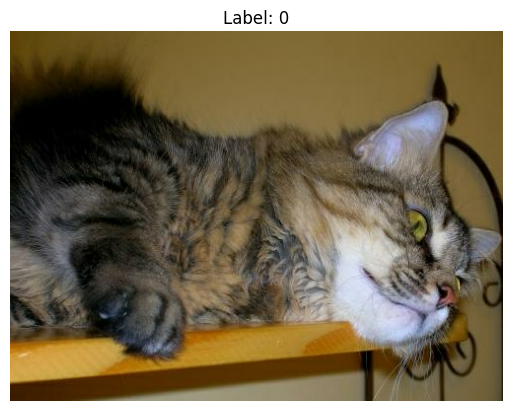

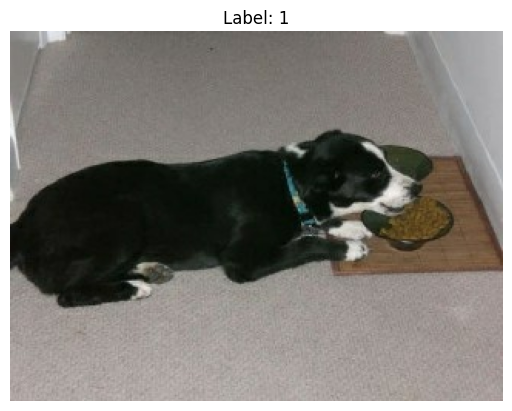

In [52]:
# Explore the dataset
for image, label in dataset[0].take(5):
  plt.fig_size = (7,7)
  plt.imshow(image.numpy())           # Convert tensors to numpy so that matplotlib and others can work with it.
  plt.title(f"Label: {label.numpy()}") # Show label 1 or 0.
  plt.axis("off")
  plt.show()


From the pics above, we can deduct that:

**Label 1:** *Dogs*

**label 0**: *Cats*


In [24]:
# Check the length of the dataset
len(dataset[0])

18610

In [38]:
# prompt: Write how many elements in the train split.

print(info.splits['train[:80%]'].num_examples)


18610


In [13]:
# Trying to get the number of images and the image shape
image.shape

TensorShape([240, 320, 3])

In [39]:
# Converting the images and the labels to arrays
image = np.array(image)
label = np.array(label)

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [63]:
# Preprocessing

# Preprocessing the image so we can fit the model a fixed shape of image and also normalize it to process and perform faster and better.
IMG_SIZE = (16, 16)

def preprocess_image(image, label):
  iamge = tf.cast(image, tf.float32)
  image = tf.image.resize(image, IMG_SIZE)
  image = image / 255.0      # Normalize
  image = tf.reshape(image, [-1])
  return image, label

In [64]:
# Applying the changes to all the images using map function and also prefetching the data to process faster.
train = raw_train.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
val = raw_val.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

In [66]:
# Create the Model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(16 * 16 * 3,)),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'softmax')
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train, validation_data=val, epochs = 5)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.4917 - loss: 0.6901 - val_accuracy: 0.5099 - val_loss: 0.6840
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.4917 - loss: 0.6786 - val_accuracy: 0.5099 - val_loss: 0.6779
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.4917 - loss: 0.6744 - val_accuracy: 0.5099 - val_loss: 0.6721
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.4917 - loss: 0.6712 - val_accuracy: 0.5099 - val_loss: 0.6699
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.4917 - loss: 0.6691 - val_accuracy: 0.5099 - val_loss: 0.6711


Using Softmax function and Adam optimizer.

The Model is performing 49% accuracy at max. No improvement


# Model 2

In [73]:
# Preprocessing
IMG_SIZE = (64, 64)

def preprocess_image(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

In [76]:
train = raw_train.map(preprocess_image).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val = raw_val.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

In [77]:
# Let's try something better
# Model 2. Let's Goooooo

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train, validation_data=val, epochs = 5)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 131s 220ms/step - accuracy: 0.5670 - loss: 6.8668 - val_accuracy: 0.6468 - val_loss: 0.6251
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 136s 232ms/step - accuracy: 0.6858 - loss: 0.5886 - val_accuracy: 0.6799 - val_loss: 0.6053
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 132s 216ms/step - accuracy: 0.7425 - loss: 0.5121 - val_accuracy: 0.7158 - val_loss: 0.5746
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 136s 231ms/step - accuracy: 0.7900 - loss: 0.4397 - val_accuracy: 0.7074 - val_loss: 0.6310
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 137s 232ms/step - accuracy: 0.8217 - loss: 0.3873 - val_accuracy: 0.7332 - val_loss: 0.6807


We used CNN for Model 2 and it has performed way better than the Dense Layer version.

Accuracy: **82%**.

Let's visualize the loss and accuracy graph and then we will try to push it even more.


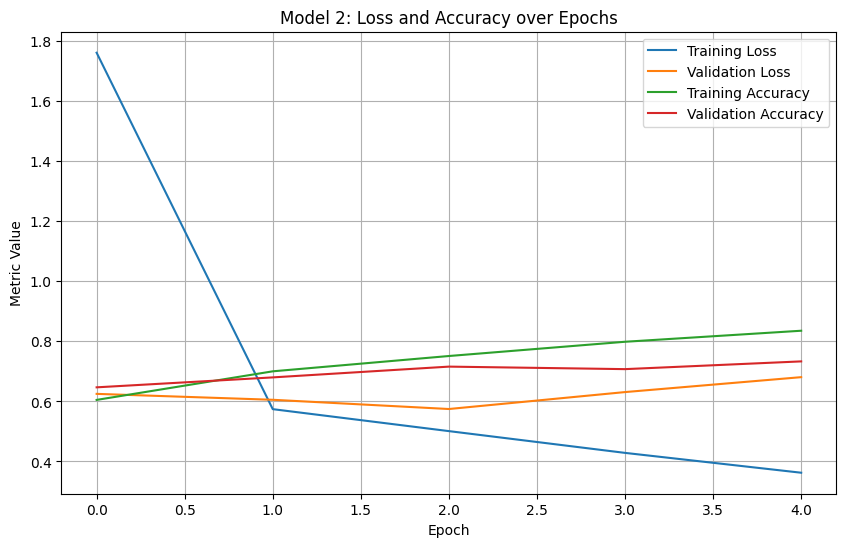

In [79]:
# prompt: Plot loss vs accuracy graph for History_2 with labels and legends in one graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2: Loss and Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# let's try to predict with Model_2
model_2.predict(val)

146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step


array([[0.6207762 ],
       [0.95757043],
       [0.998176  ],
       ...,
       [0.7573697 ],
       [0.7923277 ],
       [0.1198907 ]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


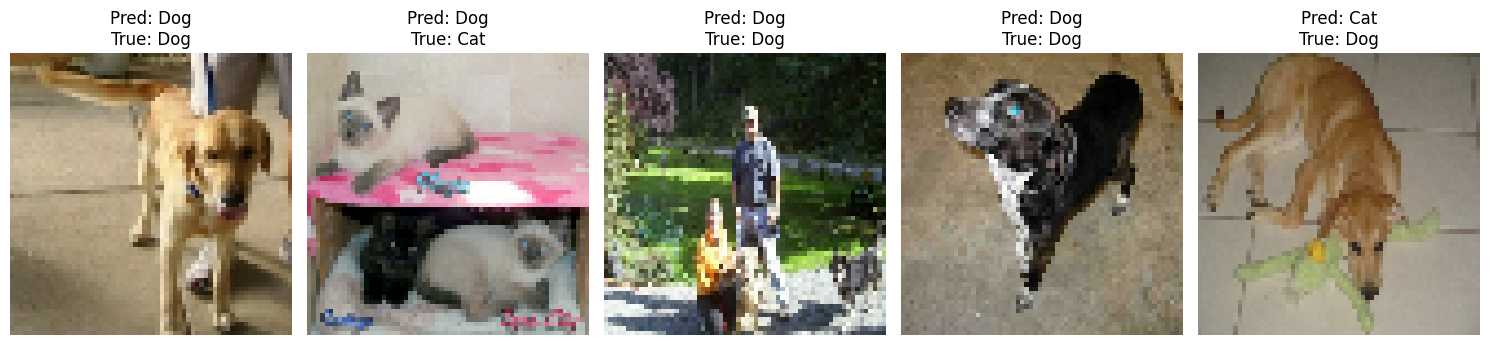

In [83]:
# Show predictions on 5 images from validation set
import matplotlib.pyplot as plt

# Fetch one batch of images and labels
for images, labels in val.take(1):
    predictions = model_2.predict(images)

    plt.figure(figsize=(15, 5))  # Wider layout for side-by-side images

    for i in range(5):  # First 5 images
        plt.subplot(1, 5, i + 1)

        # Convert tensor to numpy and ensure valid pixel range
        img = images[i].numpy()

        if img.max() > 1.0:
            img = img / 255.0  # normalize just in case

        plt.imshow(img)
        plt.axis("off")

        pred_label = 'Dog' if predictions[i] > 0.5 else 'Cat'
        true_label = 'Dog' if labels[i].numpy() == 1 else 'Cat'
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")

    plt.tight_layout()
    plt.show()


#*Model 3:*
# Using Data Augmentation Integrated with CNN


In [85]:
# Preprocess the Data
IMG_SIZE = (64, 64)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
    tf.keras.layers.RandomContrast(0.1)
])

def preprocess_train(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0

  image = data_augmentation(image)      # Apply only on training data

  return image, label

def preprocess_val(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

In [86]:
# Applying to all the data
train = raw_train.map(preprocess_train).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val = raw_val.map(preprocess_val).batch(32).prefetch(tf.data.AUTOTUNE)

In [88]:
# Create the Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (64, 64, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the Model
history_3 = model_3.fit(train, validation_data=val, epochs = 5)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 154s 257ms/step - accuracy: 0.5817 - loss: 0.6722 - val_accuracy: 0.6991 - val_loss: 0.5718
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 207s 267ms/step - accuracy: 0.6863 - loss: 0.5875 - val_accuracy: 0.6911 - val_loss: 0.5793
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 150s 252ms/step - accuracy: 0.7276 - loss: 0.5386 - val_accuracy: 0.7010 - val_loss: 0.5873
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 156s 264ms/step - accuracy: 0.7409 - loss: 0.5143 - val_accuracy: 0.7807 - val_loss: 0.4665
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 152s 255ms/step - accuracy: 0.7705 - loss: 0.4831 - val_accuracy: 0.7184 - val_loss: 0.5934


Well. This performed way worse.

Accuracy: **77%**

What happened???

#*Model 4*

Trying with more epochs

In [90]:
# Preprocess the Data
IMG_SIZE = (48, 48)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

def preprocess_train(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0

  image = data_augmentation(image)      # Apply only on training data

  return image, label

def preprocess_val(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

In [91]:
# Applying to all the data
train = raw_train.map(preprocess_train).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val = raw_val.map(preprocess_val).batch(32).prefetch(tf.data.AUTOTUNE)

In [92]:
# Create the Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (48, 48, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the Model
history_4 = model_4.fit(train, validation_data=val, epochs = 10)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 101s 165ms/step - accuracy: 0.5702 - loss: 0.6771 - val_accuracy: 0.6513 - val_loss: 0.6265
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 142s 165ms/step - accuracy: 0.6946 - loss: 0.5803 - val_accuracy: 0.7199 - val_loss: 0.5496
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 99s 166ms/step - accuracy: 0.7283 - loss: 0.5334 - val_accuracy: 0.7633 - val_loss: 0.4977
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 97s 163ms/step - accuracy: 0.7518 - loss: 0.5062 - val_accuracy: 0.7863 - val_loss: 0.4556
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 97s 163ms/step - accuracy: 0.7595 - loss: 0.4953 - val_accuracy: 0.7496 - val_loss: 0.5391
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 96s 163ms/step - accuracy: 0.7652 - loss: 0.4850 - val_accuracy: 0.7939 - val_loss: 0.4449
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 98s 164ms/step - accuracy: 0.7800 - loss: 0.4612 - val_accuracy: 0.7958 - val_loss: 0.4397
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 97s 164ms/step - accuracy: 0.7875 - loss:

lmao only 2% improvement. Let's try with higher rez


*Model 5*

In [95]:
# Preprocess the Data
IMG_SIZE = (64, 64)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

def preprocess_train(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0

  image = data_augmentation(image)      # Apply only on training data

  return image, label

def preprocess_val(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

In [96]:
# Applying to all the data
train = raw_train.map(preprocess_train).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val = raw_val.map(preprocess_val).batch(32).prefetch(tf.data.AUTOTUNE)

In [97]:
# Create the Model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (64, 64, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the Model
history_5 = model_5.fit(train, validation_data=val, epochs = 10)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 166s 276ms/step - accuracy: 0.5685 - loss: 0.6797 - val_accuracy: 0.7053 - val_loss: 0.5636
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 163s 276ms/step - accuracy: 0.7029 - loss: 0.5667 - val_accuracy: 0.7352 - val_loss: 0.5309
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 192s 258ms/step - accuracy: 0.7394 - loss: 0.5253 - val_accuracy: 0.7666 - val_loss: 0.4976
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 207s 269ms/step - accuracy: 0.7568 - loss: 0.5004 - val_accuracy: 0.7848 - val_loss: 0.4660
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 193s 252ms/step - accuracy: 0.7695 - loss: 0.4841 - val_accuracy: 0.7919 - val_loss: 0.4438
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 209s 266ms/step - accuracy: 0.7806 - loss: 0.4595 - val_accuracy: 0.7853 - val_loss: 0.4585
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 158s 267ms/step - accuracy: 0.7833 - loss: 0.4540 - val_accuracy: 0.7971 - val_loss: 0.4389
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 203s 267ms/step - accuracy: 0.7981 -

Improvement of 2%. Not bad but could be better. Let's try a little more complex model.

*Model 6*
Improving using a deeper CNN layer


In [101]:
# Preprocess the Data
IMG_SIZE = (128, 128)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

def preprocess_train(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0

  image = data_augmentation(image)      # Apply only on training data

  return image, label

def preprocess_val(image, label):
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

In [117]:
# Applying to all the data
train = raw_train.map(preprocess_train).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val = raw_val.map(preprocess_val).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

In [103]:
# Create the Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (128, 128, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the Model
history_6 = model_6.fit(train, validation_data=val, epochs = 15)

Epoch 1/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 721s 1s/step - accuracy: 0.5856 - loss: 0.6599 - val_accuracy: 0.7236 - val_loss: 0.5463
Epoch 2/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 769s 1s/step - accuracy: 0.7015 - loss: 0.5742 - val_accuracy: 0.7605 - val_loss: 0.4961
Epoch 3/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.7457 - loss: 0.5138 - val_accuracy: 0.7681 - val_loss: 0.4797
Epoch 4/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 706s 1s/step - accuracy: 0.7786 - loss: 0.4694 - val_accuracy: 0.7973 - val_loss: 0.4493
Epoch 5/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.7929 - loss: 0.4383 - val_accuracy: 0.8298 - val_loss: 0.3847
Epoch 6/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.8111 - loss: 0.4158 - val_accuracy: 0.8353 - val_loss: 0.3678
Epoch 7/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 743s 1s/step - accuracy: 0.8222 - loss: 0.3903 - val_accuracy: 0.8321 - val_loss: 0.3756
Epoch 8/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.8213 - loss: 0.3865 - val_accu

Finally, we got something close to 90%. But it took a long time.

In [104]:
# Save the Model
model_6.save('model_6.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


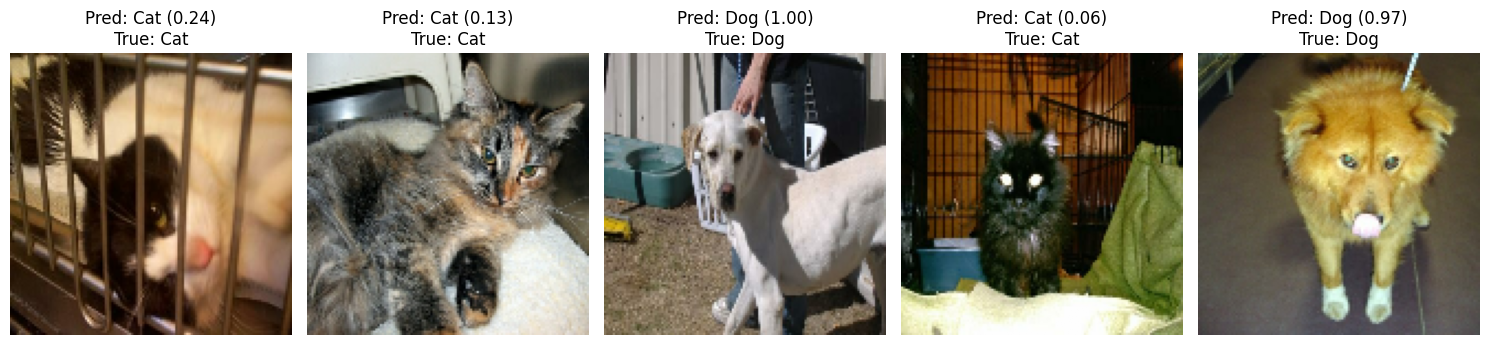

In [119]:
import itertools
import random

# Get images from multiple batches
sample_images = []
sample_labels = []

for images, labels in itertools.islice(val, 5):  # Get 5 batches
    sample_images.extend(images)
    sample_labels.extend(labels)

# Pick 5 random images across batches
random_indices = random.sample(range(len(sample_images)), 5)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)

    img = sample_images[idx].numpy()
    label = sample_labels[idx].numpy()

    # Normalize if needed
    if img.max() > 1.0:
        img = img / 255.0

    pred = model_6.predict(tf.expand_dims(img, axis=0))[0][0]
    pred_label = "Dog" if pred > 0.5 else "Cat"
    true_label = "Dog" if label == 1 else "Cat"

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Pred: {pred_label} ({pred:.2f})\nTrue: {true_label}")

plt.tight_layout()
plt.show()
